# UTS Course Data Analysis

This notebook performs comprehensive Exploratory Data Analysis (EDA) on the UTS course datasets:
- `UTS_Course_list.csv`
- `UTS_Course_Overview.csv`
- `merged_Admission_Courses.csv`

## Objectives:
1. Understand the structure and content of each dataset
2. Verify if `merged_Admission_Courses.csv` includes all data from the other two files
3. Perform comprehensive EDA including:
   - Basic statistics (head, tail, shape, info)
   - Data types and missing values
   - Unique values and distributions
   - Data quality checks
   - Comparison between datasets


In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


✅ Libraries imported successfully
Pandas version: 2.2.3
NumPy version: 2.1.2


## 1. Load Data


In [18]:
# Define data directory
data_dir = Path("data/original_course_list_excel")

# Load all CSV files
print("Loading CSV files...")
print("=" * 70)

# Load UTS_Course_list.csv
try:
    course_list = pd.read_csv(data_dir / "UTS_Course_list.csv")
    print(f"✅ Loaded UTS_Course_list.csv: {course_list.shape[0]} rows, {course_list.shape[1]} columns")
except Exception as e:
    print(f"❌ Error loading UTS_Course_list.csv: {e}")
    course_list = None

# Load UTS_Course_Overview.csv
try:
    course_overview = pd.read_csv(data_dir / "UTS_Course_Overview.csv")
    print(f"✅ Loaded UTS_Course_Overview.csv: {course_overview.shape[0]} rows, {course_overview.shape[1]} columns")
except Exception as e:
    print(f"❌ Error loading UTS_Course_Overview.csv: {e}")
    course_overview = None

# Load merged_Admission_Courses.csv
try:
    merged_courses = pd.read_csv(data_dir / "merged_Admission_Courses.csv")
    print(f"✅ Loaded merged_Admission_Courses.csv: {merged_courses.shape[0]} rows, {merged_courses.shape[1]} columns")
except Exception as e:
    print(f"❌ Error loading merged_Admission_Courses.csv: {e}")
    merged_courses = None

print("=" * 70)


Loading CSV files...
✅ Loaded UTS_Course_list.csv: 644 rows, 1 columns
✅ Loaded UTS_Course_Overview.csv: 644 rows, 4 columns
✅ Loaded merged_Admission_Courses.csv: 644 rows, 58 columns


## 2. Dataset Overview


In [19]:
# Display basic information about each dataset
datasets = {
    "UTS_Course_list": course_list,
    "UTS_Course_Overview": course_overview,
    "merged_Admission_Courses": merged_courses
}

print("DATASET OVERVIEW")
print("=" * 70)
for name, df in datasets.items():
    if df is not None:
        print(f"\n{name}:")
        print(f"  Shape: {df.shape[0]} rows × {df.shape[1]} columns")
        print(f"  Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        print(f"  Columns: {list(df.columns)}")
    else:
        print(f"\n{name}: Not loaded")


DATASET OVERVIEW

UTS_Course_list:
  Shape: 644 rows × 1 columns
  Memory usage: 0.06 MB
  Columns: ['Course Name_y']

UTS_Course_Overview:
  Shape: 644 rows × 4 columns
  Memory usage: 1.05 MB
  Columns: ['Course Name_y', 'Course Name_x', 'Overview', 'Course Code']

merged_Admission_Courses:
  Shape: 644 rows × 58 columns
  Memory usage: 9.12 MB
  Columns: ['All Course Codes', 'Course Code', 'CRICOS Code', 'Course Name_x', 'Course Duration (Session)', 'Course Fee (A$/Session)', 'Course Intake', 'Admission requirements for Australian students (ATAR)', 'Admission requirements for Chinese students (Gaokao score out of 750)', 'Admission requirements for students with GCE A Levels', 'Admission requirements for Hong Kong students (HKDSE)', 'Admission requirements for Indian students (AISSC)', 'Admission requirements for Indian students (ISC)', 'Admission requirements for students with IB or Predicted IB', 'Admission requirements for Malaysian students (STPM with 3 AL Subjects)', 'Admission 

## 3. UTS_Course_list.csv Analysis


In [20]:
if course_list is not None:
    print("UTS_Course_list.csv - HEAD")
    print("=" * 70)
    print(course_list.head(10))
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_list.csv - TAIL")
    print("=" * 70)
    print(course_list.tail(10))
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_list.csv - INFO")
    print("=" * 70)
    print(course_list.info())
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_list.csv - BASIC STATISTICS")
    print("=" * 70)
    print(course_list.describe(include='all'))
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_list.csv - UNIQUE VALUES")
    print("=" * 70)
    for col in course_list.columns:
        unique_count = course_list[col].nunique()
        total_count = len(course_list)
        print(f"{col}: {unique_count} unique values out of {total_count} total ({unique_count/total_count*100:.2f}% unique)")
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_list.csv - MISSING VALUES")
    print("=" * 70)
    missing = course_list.isnull().sum()
    missing_pct = (missing / len(course_list)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing Percentage': missing_pct
    })
    print(missing_df[missing_df['Missing Count'] > 0])
    if missing_df[missing_df['Missing Count'] > 0].empty:
        print("No missing values!")
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_list.csv - VALUE COUNTS (Top 10)")
    print("=" * 70)
    for col in course_list.columns:
        print(f"\n{col} - Top 10 values:")
        print(course_list[col].value_counts().head(10))
else:
    print("UTS_Course_list.csv not loaded")


UTS_Course_list.csv - HEAD
            Course Name_y
0    Bachelor of Business
1    Bachelor of Business
2    Bachelor of Business
3    Bachelor of Business
4    Bachelor of Business
5    Bachelor of Business
6    Bachelor of Business
7    Bachelor of Business
8  Bachelor of Management
9   Bachelor of Economics


UTS_Course_list.csv - TAIL
                                               Course Name_y
634  Graduate Certificate in Sustainable Energy Technologies
635             Graduate Certificate in Sustainable Practice
636           Graduate Certificate in Sustainable Leadership
637  Graduate Certificate in Writing, Editing and Publishing
638  Diploma in Information Technology Professional Practice
639                                     Diploma in Languages
640                                    Diploma in Innovation
641                    Diploma in Fashion and Sustainability
642                     Undergraduate Certificate in Science
643               Associate Degree of Advanced M

## 4. UTS_Course_Overview.csv Analysis


In [21]:
if course_overview is not None:
    print("UTS_Course_Overview.csv - HEAD")
    print("=" * 70)
    print(course_overview.head(10))
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_Overview.csv - TAIL")
    print("=" * 70)
    print(course_overview.tail(10))
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_Overview.csv - INFO")
    print("=" * 70)
    print(course_overview.info())
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_Overview.csv - BASIC STATISTICS")
    print("=" * 70)
    print(course_overview.describe(include='all'))
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_Overview.csv - UNIQUE VALUES")
    print("=" * 70)
    for col in course_overview.columns:
        unique_count = course_overview[col].nunique()
        total_count = len(course_overview)
        print(f"{col}: {unique_count} unique values out of {total_count} total ({unique_count/total_count*100:.2f}% unique)")
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_Overview.csv - MISSING VALUES")
    print("=" * 70)
    missing = course_overview.isnull().sum()
    missing_pct = (missing / len(course_overview)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing Percentage': missing_pct
    })
    print(missing_df[missing_df['Missing Count'] > 0])
    if missing_df[missing_df['Missing Count'] > 0].empty:
        print("No missing values!")
    print("\n" + "=" * 70)
    
    print("\nUTS_Course_Overview.csv - VALUE COUNTS (Top 10 per column)")
    print("=" * 70)
    for col in course_overview.columns:
        if course_overview[col].dtype == 'object':
            print(f"\n{col} - Top 10 values:")
            print(course_overview[col].value_counts().head(10))
else:
    print("UTS_Course_Overview.csv not loaded")


UTS_Course_Overview.csv - HEAD
            Course Name_y                             Course Name_x  \
0    Bachelor of Business                               Accounting    
1    Bachelor of Business  Advertising and Marketing Communication    
2    Bachelor of Business                                Economics    
3    Bachelor of Business                                  Finance    
4    Bachelor of Business                Human Resource Management    
5    Bachelor of Business                   International Business    
6    Bachelor of Business                               Management    
7    Bachelor of Business                                Marketing    
8  Bachelor of Management                               Management    
9   Bachelor of Economics                                Economics    

                                                                                              Overview  \
0  The Bachelor of Business offers students a sound background in all areas of bu

## 5. merged_Admission_Courses.csv Analysis


In [22]:
if merged_courses is not None:
    print("merged_Admission_Courses.csv - HEAD")
    print("=" * 70)
    print(merged_courses.head(10))
    print("\n" + "=" * 70)
    
    print("\nmerged_Admission_Courses.csv - TAIL")
    print("=" * 70)
    print(merged_courses.tail(10))
    print("\n" + "=" * 70)
    
    print("\nmerged_Admission_Courses.csv - INFO")
    print("=" * 70)
    print(merged_courses.info())
    print("\n" + "=" * 70)
    
    print("\nmerged_Admission_Courses.csv - COLUMN NAMES")
    print("=" * 70)
    print(f"Total columns: {len(merged_courses.columns)}")
    for i, col in enumerate(merged_courses.columns, 1):
        print(f"{i:2d}. {col}")
    print("\n" + "=" * 70)
    
    print("\nmerged_Admission_Courses.csv - BASIC STATISTICS (Numerical)")
    print("=" * 70)
    print(merged_courses.describe())
    print("\n" + "=" * 70)
    
    print("\nmerged_Admission_Courses.csv - BASIC STATISTICS (All)")
    print("=" * 70)
    print(merged_courses.describe(include='all'))
    print("\n" + "=" * 70)


merged_Admission_Courses.csv - HEAD
  All Course Codes Course Code CRICOS Code  \
0           C10026     C10026     006487A    
1           C10026     C10026     006487A    
2           C10026     C10026     006487A    
3           C10026     C10026     006487A    
4           C10026     C10026     006487A    
5           C10026     C10026     006487A    
6           C10026     C10026     006487A    
7           C10026     C10026     006487A    
8           C10342     C10342     084784A    
9           C10348     C10348     086359B    

                              Course Name_x Course Duration (Session)  \
0                               Accounting                          6   
1  Advertising and Marketing Communication                          6   
2                                Economics                          6   
3                                  Finance                          6   
4                Human Resource Management                          6   
5                  

In [23]:
if merged_courses is not None:
    print("merged_Admission_Courses.csv - UNIQUE VALUES")
    print("=" * 70)
    for col in merged_courses.columns:
        unique_count = merged_courses[col].nunique()
        total_count = len(merged_courses)
        pct = (unique_count/total_count*100) if total_count > 0 else 0
        print(f"{col}: {unique_count} unique values out of {total_count} total ({pct:.2f}% unique)")
    print("\n" + "=" * 70)
    
    print("\nmerged_Admission_Courses.csv - MISSING VALUES")
    print("=" * 70)
    missing = merged_courses.isnull().sum()
    missing_pct = (missing / len(merged_courses)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing Percentage': missing_pct
    }).sort_values('Missing Count', ascending=False)
    
    print(f"Total columns with missing values: {(missing_df['Missing Count'] > 0).sum()}")
    print("\nColumns with missing values:")
    print(missing_df[missing_df['Missing Count'] > 0])
    print("\n" + "=" * 70)
    
    print("\nmerged_Admission_Courses.csv - DATA TYPES")
    print("=" * 70)
    dtype_counts = merged_courses.dtypes.value_counts()
    print(dtype_counts)
    print("\n" + "=" * 70)


merged_Admission_Courses.csv - UNIQUE VALUES
All Course Codes: 586 unique values out of 644 total (90.99% unique)
Course Code: 133 unique values out of 644 total (20.65% unique)
CRICOS Code: 133 unique values out of 644 total (20.65% unique)
Course Name_x: 140 unique values out of 644 total (21.74% unique)
Course Duration (Session): 13 unique values out of 644 total (2.02% unique)
Course Fee (A$/Session): 15 unique values out of 644 total (2.33% unique)
Course Intake: 3 unique values out of 644 total (0.47% unique)
Admission requirements for Australian students (ATAR): 22 unique values out of 644 total (3.42% unique)
Admission requirements for Chinese students (Gaokao score out of 750): 17 unique values out of 644 total (2.64% unique)
Admission requirements for students with GCE A Levels: 7 unique values out of 644 total (1.09% unique)
Admission requirements for Hong Kong students (HKDSE): 7 unique values out of 644 total (1.09% unique)
Admission requirements for Indian students (AISSC

## 6. Data Comparison: Verify if merged file includes all data


In [24]:
print("DATA COMPARISON ANALYSIS")
print("=" * 70)

# Check if merged file includes data from Course_list
if course_list is not None and merged_courses is not None:
    print("\n1. Comparing UTS_Course_list with merged_Admission_Courses")
    print("-" * 70)
    
    # Find common columns
    common_cols = set(course_list.columns) & set(merged_courses.columns)
    print(f"Common columns: {common_cols}")
    
    if 'Course Name_y' in course_list.columns and 'Course Name_y' in merged_courses.columns:
        list_courses = set(course_list['Course Name_y'].dropna().unique())
        merged_courses_list = set(merged_courses['Course Name_y'].dropna().unique())
        
        print(f"\nUTS_Course_list unique courses: {len(list_courses)}")
        print(f"merged_Admission_Courses unique courses: {len(merged_courses_list)}")
        
        missing_in_merged = list_courses - merged_courses_list
        extra_in_merged = merged_courses_list - list_courses
        
        print(f"\nCourses in UTS_Course_list but NOT in merged: {len(missing_in_merged)}")
        if missing_in_merged:
            print("Missing courses:")
            for course in sorted(missing_in_merged)[:10]:  # Show first 10
                print(f"  - {course}")
            if len(missing_in_merged) > 10:
                print(f"  ... and {len(missing_in_merged) - 10} more")
        
        print(f"\nCourses in merged but NOT in UTS_Course_list: {len(extra_in_merged)}")
        if extra_in_merged:
            print("Extra courses (first 10):")
            for course in sorted(extra_in_merged)[:10]:
                print(f"  - {course}")
        
        coverage = (len(list_courses & merged_courses_list) / len(list_courses) * 100) if list_courses else 0
        print(f"\nCoverage: {coverage:.2f}% of UTS_Course_list courses are in merged file")
    else:
        print("Cannot compare: 'Course Name_y' column not found in both datasets")
else:
    print("Cannot compare: One or both datasets not loaded")


DATA COMPARISON ANALYSIS

1. Comparing UTS_Course_list with merged_Admission_Courses
----------------------------------------------------------------------
Common columns: {'Course Name_y'}

UTS_Course_list unique courses: 528
merged_Admission_Courses unique courses: 528

Courses in UTS_Course_list but NOT in merged: 0

Courses in merged but NOT in UTS_Course_list: 0

Coverage: 100.00% of UTS_Course_list courses are in merged file


In [25]:
# Check if merged file includes data from Course_Overview
if course_overview is not None and merged_courses is not None:
    print("\n2. Comparing UTS_Course_Overview with merged_Admission_Courses")
    print("-" * 70)
    
    # Find common columns
    common_cols = set(course_overview.columns) & set(merged_courses.columns)
    print(f"Common columns: {common_cols}")
    
    # Compare by Course Code
    if 'Course Code' in course_overview.columns and 'Course Code' in merged_courses.columns:
        overview_codes = set(course_overview['Course Code'].dropna().unique())
        merged_codes = set(merged_courses['Course Code'].dropna().unique())
        
        print(f"\nUTS_Course_Overview unique course codes: {len(overview_codes)}")
        print(f"merged_Admission_Courses unique course codes: {len(merged_codes)}")
        
        missing_in_merged = overview_codes - merged_codes
        extra_in_merged = merged_codes - overview_codes
        
        print(f"\nCourse codes in UTS_Course_Overview but NOT in merged: {len(missing_in_merged)}")
        if missing_in_merged:
            print("Missing course codes (first 10):")
            for code in sorted(missing_in_merged)[:10]:
                print(f"  - {code}")
        
        print(f"\nCourse codes in merged but NOT in UTS_Course_Overview: {len(extra_in_merged)}")
        if extra_in_merged:
            print("Extra course codes (first 10):")
            for code in sorted(extra_in_merged)[:10]:
                print(f"  - {code}")
        
        coverage = (len(overview_codes & merged_codes) / len(overview_codes) * 100) if overview_codes else 0
        print(f"\nCoverage: {coverage:.2f}% of UTS_Course_Overview course codes are in merged file")
    
    # Compare by Course Name_y
    if 'Course Name_y' in course_overview.columns and 'Course Name_y' in merged_courses.columns:
        overview_names = set(course_overview['Course Name_y'].dropna().unique())
        merged_names = set(merged_courses['Course Name_y'].dropna().unique())
        
        print(f"\nUTS_Course_Overview unique course names: {len(overview_names)}")
        print(f"merged_Admission_Courses unique course names: {len(merged_names)}")
        
        missing_in_merged = overview_names - merged_names
        coverage = (len(overview_names & merged_names) / len(overview_names) * 100) if overview_names else 0
        print(f"Coverage: {coverage:.2f}% of UTS_Course_Overview course names are in merged file")
else:
    print("Cannot compare: One or both datasets not loaded")



2. Comparing UTS_Course_Overview with merged_Admission_Courses
----------------------------------------------------------------------
Common columns: {'Course Name_x', 'Course Name_y', 'Course Code', 'Overview'}

UTS_Course_Overview unique course codes: 133
merged_Admission_Courses unique course codes: 133

Course codes in UTS_Course_Overview but NOT in merged: 0

Course codes in merged but NOT in UTS_Course_Overview: 0

Coverage: 100.00% of UTS_Course_Overview course codes are in merged file

UTS_Course_Overview unique course names: 528
merged_Admission_Courses unique course names: 528
Coverage: 100.00% of UTS_Course_Overview course names are in merged file


## 6.1. Detailed Column and Value Comparison: course_overview vs merged_courses


In [26]:
print("DETAILED COLUMN AND VALUE COMPARISON")
print("=" * 70)
print("Comparing UTS_Course_Overview with merged_Admission_Courses")
print("=" * 70)

# Check if variables are defined, if not, try to load them
try:
    if 'course_overview' not in globals() or course_overview is None:
        print("⚠️  course_overview not found. Attempting to load...")
        data_dir = Path("data/original_course_list_excel")
        course_overview = pd.read_csv(data_dir / "UTS_Course_Overview.csv")
        print(f"✅ Loaded course_overview: {course_overview.shape[0]} rows, {course_overview.shape[1]} columns")
except Exception as e:
    print(f"❌ Error loading course_overview: {e}")
    course_overview = None

try:
    if 'merged_courses' not in globals() or merged_courses is None:
        print("⚠️  merged_courses not found. Attempting to load...")
        data_dir = Path("data/original_course_list_excel")
        merged_courses = pd.read_csv(data_dir / "merged_Admission_Courses.csv")
        print(f"✅ Loaded merged_courses: {merged_courses.shape[0]} rows, {merged_courses.shape[1]} columns")
except Exception as e:
    print(f"❌ Error loading merged_courses: {e}")
    merged_courses = None

print("=" * 70)

if course_overview is not None and merged_courses is not None:
    # Step 1: Check if all columns from course_overview exist in merged_courses
    print("\n1. COLUMN PRESENCE CHECK")
    print("-" * 70)
    
    overview_cols = set(course_overview.columns)
    merged_cols = set(merged_courses.columns)
    
    common_cols = overview_cols & merged_cols
    missing_cols = overview_cols - merged_cols
    
    print(f"Total columns in UTS_Course_Overview: {len(overview_cols)}")
    print(f"Columns found in merged_Admission_Courses: {len(common_cols)}")
    print(f"Columns missing in merged_Admission_Courses: {len(missing_cols)}")
    
    if missing_cols:
        print(f"\n❌ Missing columns in merged file:")
        for col in sorted(missing_cols):
            print(f"  - {col}")
    else:
        print("\n✅ All columns from UTS_Course_Overview are present in merged_Admission_Courses")
    
    print(f"\nCommon columns ({len(common_cols)}):")
    for col in sorted(common_cols):
        print(f"  - {col}")
    
    # Step 2: Compare values for common columns
    print("\n" + "=" * 70)
    print("2. VALUE MATCHING CHECK")
    print("-" * 70)
    
    if len(common_cols) > 0:
        # Find a common key to match rows
        # Try Course Code first, then Course Name_y
        merge_key = None
        if 'Course Code' in common_cols:
            merge_key = 'Course Code'
        elif 'Course Name_y' in common_cols:
            merge_key = 'Course Name_y'
        elif 'Course Name_x' in common_cols:
            merge_key = 'Course Name_x'
        
        if merge_key:
            print(f"Using '{merge_key}' as merge key to match rows")
            
            # Merge datasets on the key
            merged_comparison = course_overview.merge(
                merged_courses,
                on=merge_key,
                how='inner',
                suffixes=('_overview', '_merged'),
                indicator=True
            )
            
            print(f"\nRows matched: {len(merged_comparison)}")
            print(f"Rows in course_overview: {len(course_overview)}")
            print(f"Rows in merged_courses: {len(merged_courses)}")
            
            if len(merged_comparison) == 0:
                print("\n⚠️  No rows matched! Cannot compare values.")
            else:
                # Compare values for each common column
                print("\n" + "-" * 70)
                print("Value comparison results:")
                print("-" * 70)
                
                comparison_results = []
                
                for col in sorted(common_cols):
                    if col == merge_key:
                        continue  # Skip the merge key itself
                    
                    # After merge, columns that exist in both datasets get suffixes
                    # Columns that only exist in one dataset keep their original name
                    col_overview = f"{col}_overview"
                    col_merged = f"{col}_merged"
                    
                    # Check if columns with suffixes exist (they should for common columns)
                    if col_overview not in merged_comparison.columns:
                        # If suffix doesn't exist, the column might only be in one dataset
                        # Try without suffix
                        if col in merged_comparison.columns:
                            # Column exists but only in one dataset, skip comparison
                            print(f"\n⚠️  {col}: Column exists but not in both datasets after merge")
                            continue
                        else:
                            print(f"\n⚠️  {col}: Column not found in merged comparison dataframe")
                            continue
                    
                    if col_merged not in merged_comparison.columns:
                        print(f"\n⚠️  {col}: Column '_merged' version not found")
                        continue
                    
                    # Compare values
                    # Convert to string for comparison (handles NaN and different types)
                    # Use fillna to handle NaN values consistently
                    overview_vals = merged_comparison[col_overview].astype(str).fillna('').str.strip()
                    merged_vals = merged_comparison[col_merged].astype(str).fillna('').str.strip()
                    
                    # Count matches and mismatches
                    matches = (overview_vals == merged_vals).sum()
                    mismatches = (overview_vals != merged_vals).sum()
                    total = len(merged_comparison)
                    
                    match_pct = (matches / total * 100) if total > 0 else 0
                    
                    comparison_results.append({
                        'Column': col,
                        'Total_Rows': total,
                        'Matches': matches,
                        'Mismatches': mismatches,
                        'Match_Percentage': match_pct
                    })
                    
                    if mismatches > 0:
                        print(f"\n⚠️  {col}:")
                        print(f"   Matches: {matches}/{total} ({match_pct:.2f}%)")
                        print(f"   Mismatches: {mismatches}/{total} ({100-match_pct:.2f}%)")
                        
                        # Show some example mismatches
                        mismatch_mask = overview_vals != merged_vals
                        mismatch_indices = merged_comparison[mismatch_mask].index[:5]
                        
                        if len(mismatch_indices) > 0:
                            print(f"   Example mismatches (first {min(5, len(mismatch_indices))}):")
                            for idx in mismatch_indices[:5]:
                                overview_val = merged_comparison.loc[idx, col_overview]
                                merged_val = merged_comparison.loc[idx, col_merged]
                                key_val = merged_comparison.loc[idx, merge_key]
                                
                                # Truncate long values for display
                                overview_str = str(overview_val)[:150]
                                merged_str = str(merged_val)[:150]
                                
                                print(f"     Row {idx} ({merge_key}={key_val}):")
                                print(f"       Overview: {overview_str}")
                                print(f"       Merged:   {merged_str}")
                                if len(str(overview_val)) > 150 or len(str(merged_val)) > 150:
                                    print(f"       (truncated)")
                    else:
                        print(f"\n✅ {col}: All {total} values match perfectly (100%)")
                
                # Summary table
                print("\n" + "=" * 70)
                print("SUMMARY TABLE")
                print("=" * 70)
                if comparison_results:
                    results_df = pd.DataFrame(comparison_results)
                    results_df = results_df.sort_values('Match_Percentage')
                    print(results_df.to_string(index=False))
                    
                    # Overall statistics
                    print("\n" + "-" * 70)
                    print("OVERALL STATISTICS:")
                    print("-" * 70)
                    perfect_matches = (results_df['Match_Percentage'] == 100).sum()
                    print(f"Columns with perfect matches: {perfect_matches}/{len(results_df)}")
                    print(f"Columns with mismatches: {len(results_df) - perfect_matches}/{len(results_df)}")
                    if len(results_df) > 0:
                        avg_match = results_df['Match_Percentage'].mean()
                        print(f"Average match percentage: {avg_match:.2f}%")
                else:
                    print("No comparison results available")
        else:
            print("⚠️  Cannot find a suitable merge key (Course Code, Course Name_y, or Course Name_x)")
            print("Available columns in both datasets:")
            print(f"  course_overview: {sorted(course_overview.columns)}")
            print(f"  merged_courses: {sorted(merged_courses.columns)}")
    else:
        print("⚠️  No common columns found to compare")
else:
    print("❌ Cannot compare: One or both datasets not loaded")


DETAILED COLUMN AND VALUE COMPARISON
Comparing UTS_Course_Overview with merged_Admission_Courses

1. COLUMN PRESENCE CHECK
----------------------------------------------------------------------
Total columns in UTS_Course_Overview: 4
Columns found in merged_Admission_Courses: 4
Columns missing in merged_Admission_Courses: 0

✅ All columns from UTS_Course_Overview are present in merged_Admission_Courses

Common columns (4):
  - Course Code
  - Course Name_x
  - Course Name_y
  - Overview

2. VALUE MATCHING CHECK
----------------------------------------------------------------------
Using 'Course Code' as merge key to match rows

Rows matched: 205784
Rows in course_overview: 644
Rows in merged_courses: 644

----------------------------------------------------------------------
Value comparison results:
----------------------------------------------------------------------



⚠️  Course Name_x:
   Matches: 205446/205784 (99.84%)
   Mismatches: 338/205784 (0.16%)
   Example mismatches (first 5):
     Row 1 (Course Code=C10026 ):
       Overview: Accounting 
       Merged:   Advertising and Marketing Communication 
     Row 2 (Course Code=C10026 ):
       Overview: Accounting 
       Merged:   Economics 
     Row 3 (Course Code=C10026 ):
       Overview: Accounting 
       Merged:   Finance 
     Row 4 (Course Code=C10026 ):
       Overview: Accounting 
       Merged:   Human Resource Management 
     Row 5 (Course Code=C10026 ):
       Overview: Accounting 
       Merged:   International Business 

⚠️  Course Name_y:
   Matches: 2784/205784 (1.35%)
   Mismatches: 203000/205784 (98.65%)
   Example mismatches (first 5):
     Row 617 (Course Code=nan):
       Overview: Doctor of Philosophy
       Merged:   Master of Architecture (Research)
     Row 618 (Course Code=nan):
       Overview: Doctor of Philosophy
       Merged:   Master of Built Environment (Resear

## 7. Distribution Analysis


In [27]:
# Distribution analysis for merged_courses
if merged_courses is not None:
    print("DISTRIBUTION ANALYSIS - merged_Admission_Courses.csv")
    print("=" * 70)
    
    # Identify numerical columns
    numerical_cols = merged_courses.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = merged_courses.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")
    print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols[:10]}..." if len(categorical_cols) > 10 else f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
    
    # Distribution for numerical columns
    if numerical_cols:
        print("\n" + "=" * 70)
        print("NUMERICAL COLUMNS DISTRIBUTION")
        print("=" * 70)
        for col in numerical_cols:
            print(f"\n{col}:")
            print(f"  Mean: {merged_courses[col].mean():.2f}")
            print(f"  Median: {merged_courses[col].median():.2f}")
            print(f"  Std: {merged_courses[col].std():.2f}")
            print(f"  Min: {merged_courses[col].min()}")
            print(f"  Max: {merged_courses[col].max()}")
            print(f"  Skewness: {merged_courses[col].skew():.2f}")
    
    # Distribution for key categorical columns
    print("\n" + "=" * 70)
    print("KEY CATEGORICAL COLUMNS DISTRIBUTION")
    print("=" * 70)
    
    key_categorical = ['Course Code', 'Course Name_y', 'Course Name_x', 'Course Intake', 
                       'Course Duration (Session)'] if merged_courses is not None else []
    
    for col in key_categorical:
        if col in merged_courses.columns:
            print(f"\n{col}:")
            value_counts = merged_courses[col].value_counts()
            print(f"  Total unique values: {merged_courses[col].nunique()}")
            print(f"  Top 5 values:")
            for val, count in value_counts.head(5).items():
                pct = (count / len(merged_courses)) * 100
                print(f"    {val}: {count} ({pct:.2f}%)")
else:
    print("merged_Admission_Courses.csv not loaded")


DISTRIBUTION ANALYSIS - merged_Admission_Courses.csv

Numerical columns (2): ['Course Fee (A$/Session)', 'Course diagram']
Categorical columns (56): ['All Course Codes', 'Course Code', 'CRICOS Code', 'Course Name_x', 'Course Duration (Session)', 'Course Intake', 'Admission requirements for Australian students (ATAR)', 'Admission requirements for Chinese students (Gaokao score out of 750)', 'Admission requirements for students with GCE A Levels', 'Admission requirements for Hong Kong students (HKDSE)']...

NUMERICAL COLUMNS DISTRIBUTION

Course Fee (A$/Session):
  Mean: 22744.42
  Median: 22750.00
  Std: 1898.58
  Min: 19060.0
  Max: 26250.0
  Skewness: 0.02

Course diagram:
  Mean: nan
  Median: nan
  Std: nan
  Min: nan
  Max: nan
  Skewness: nan

KEY CATEGORICAL COLUMNS DISTRIBUTION

Course Code:
  Total unique values: 133
  Top 5 values:
    C09066 : 16 (2.48%)
    C10026 : 8 (1.24%)
    C10446 : 5 (0.78%)
    C10405 : 3 (0.47%)
    C10404 : 3 (0.47%)

Course Name_y:
  Total unique 

## 8.1. Distribution Bar Charts for All Columns


DISTRIBUTION BAR CHARTS FOR ALL COLUMNS

1. COURSE_OVERVIEW DISTRIBUTIONS
----------------------------------------------------------------------
Total columns: 4


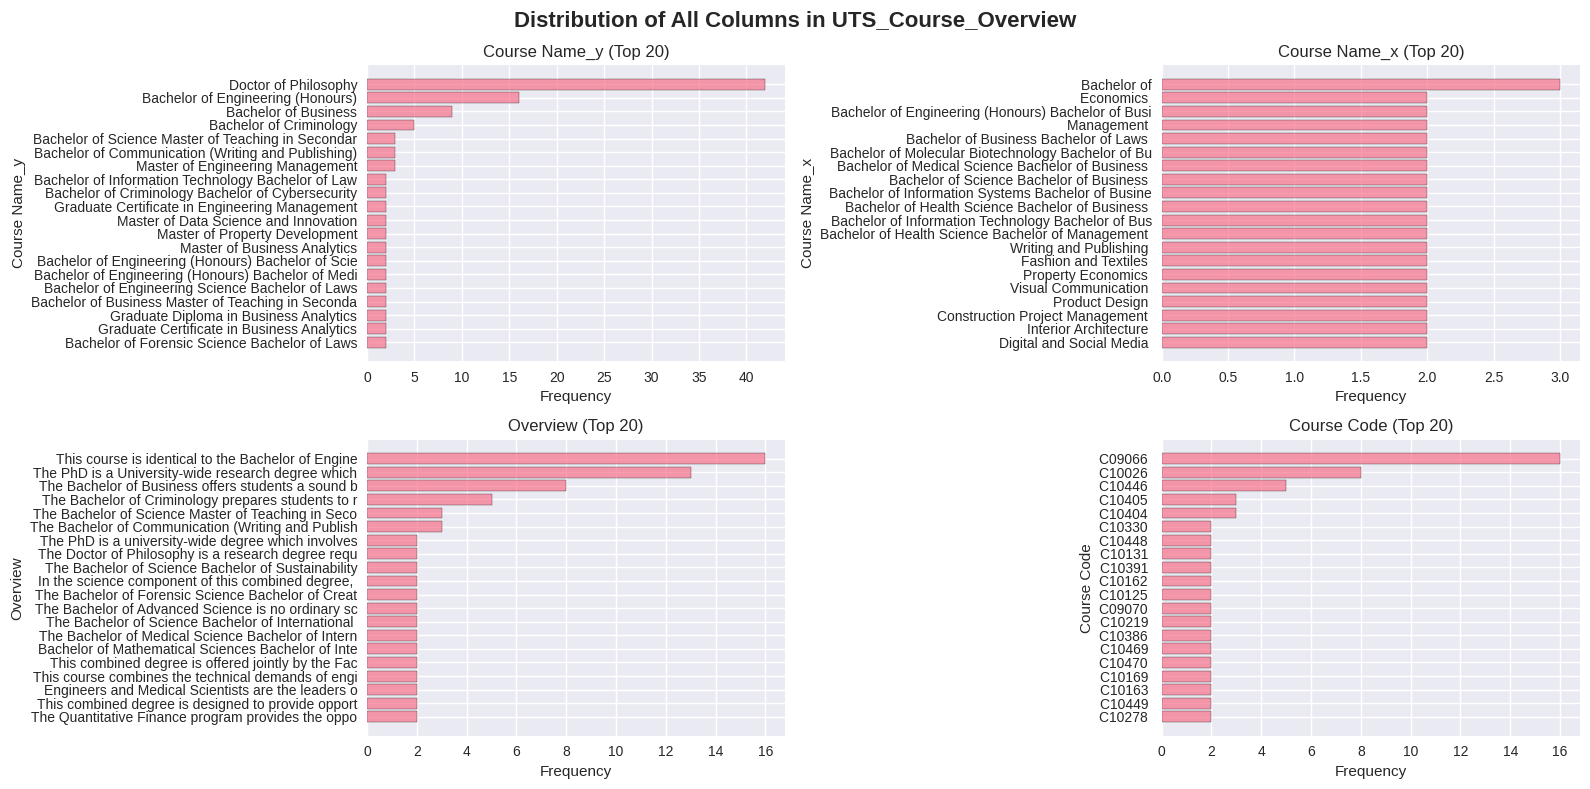


2. MERGED_COURSES DISTRIBUTIONS
----------------------------------------------------------------------
Total columns: 58
Note: Showing first 20 columns. Total columns: 58


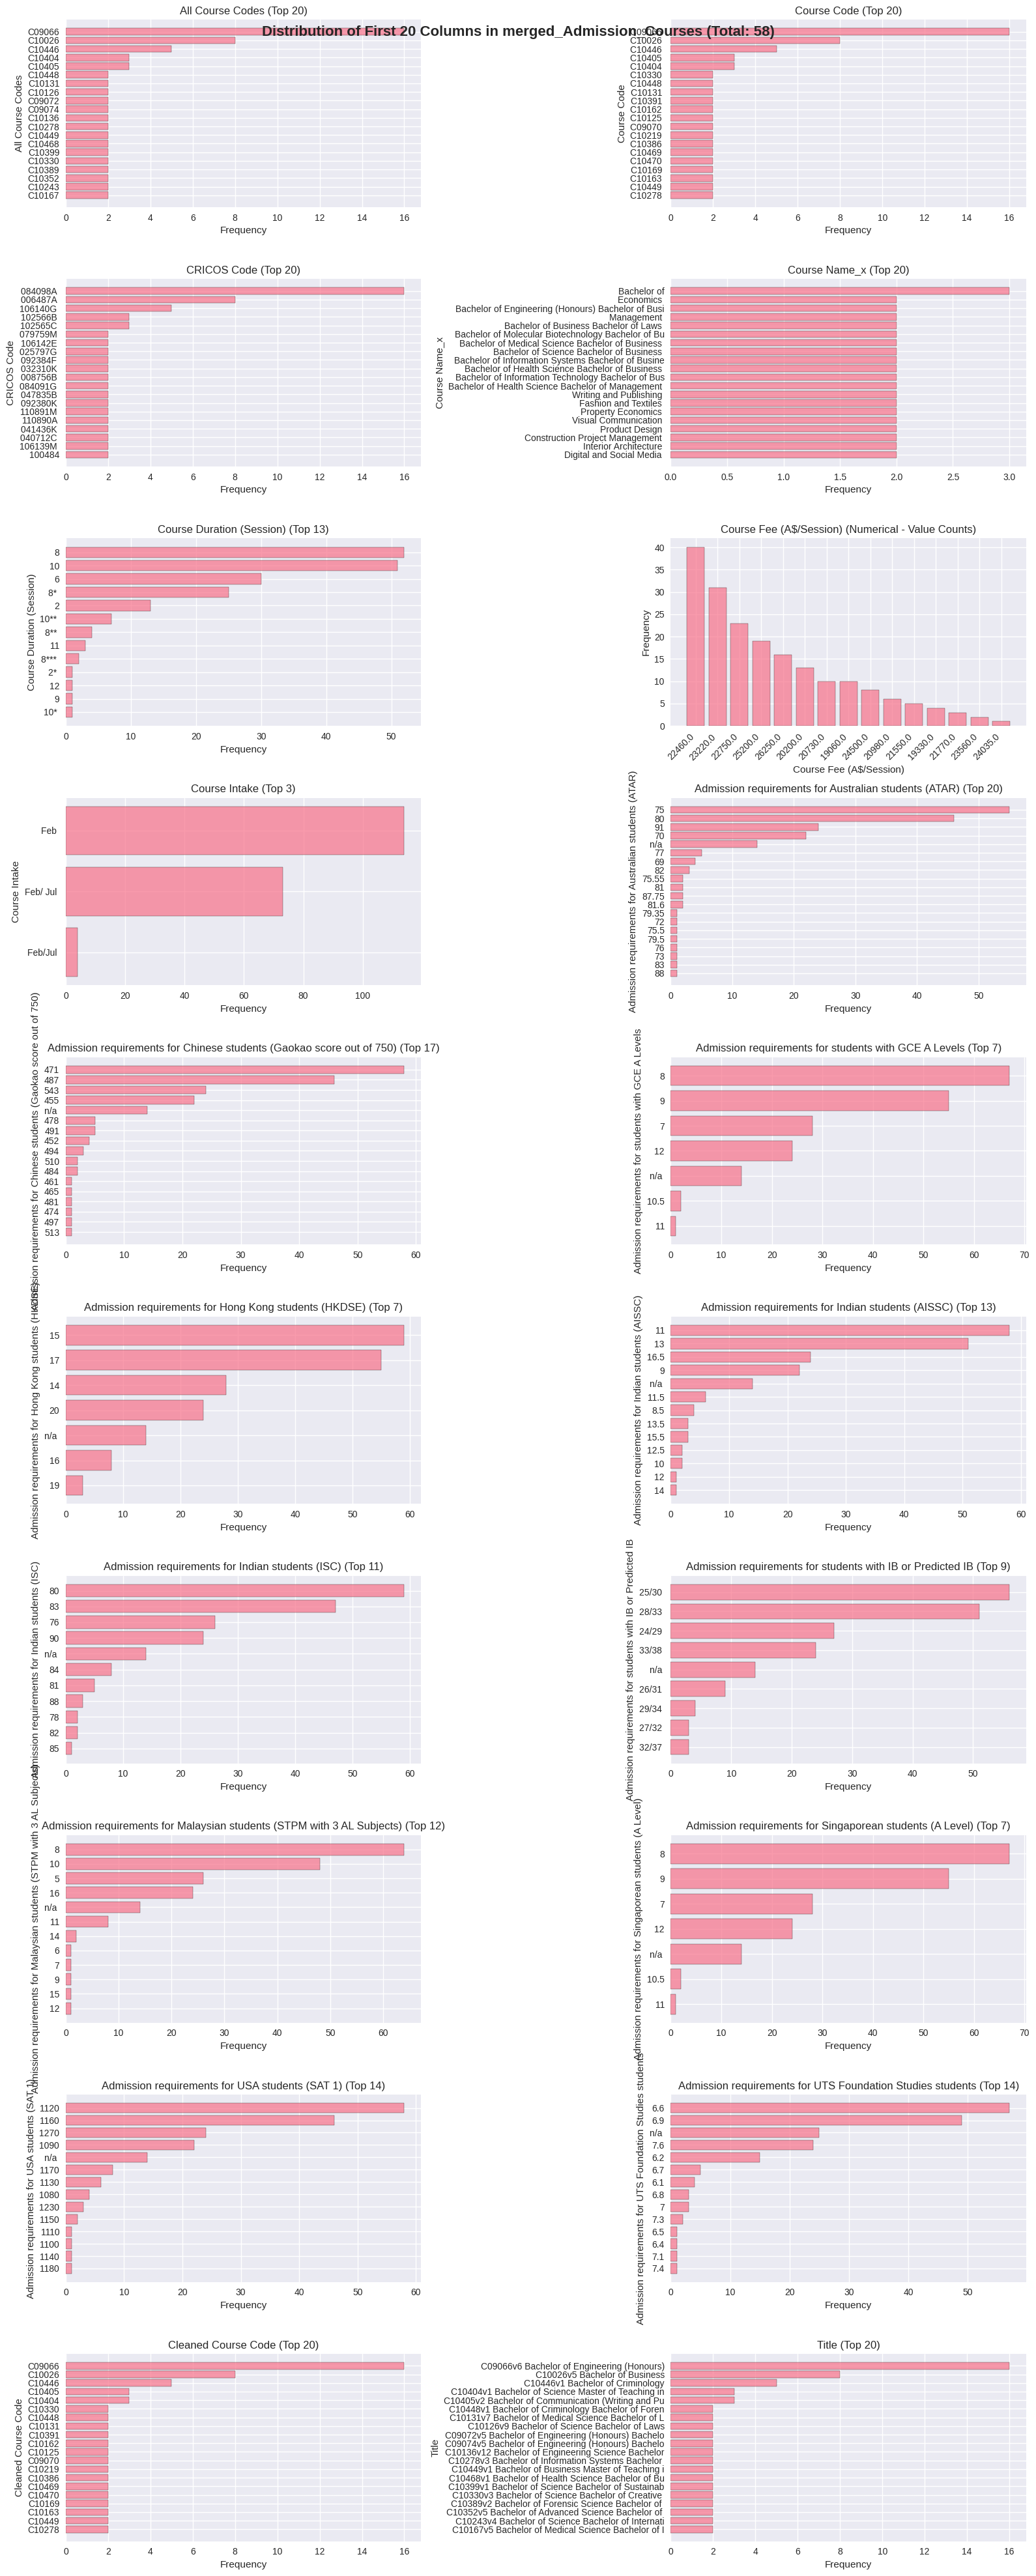


✅ Distribution charts created for course_overview (4 columns)
✅ Distribution charts created for merged_courses (showing first 20 of 58 columns)


In [28]:
print("DISTRIBUTION BAR CHARTS FOR ALL COLUMNS")
print("=" * 70)

# Check if variables are defined, if not, try to load them
try:
    if 'course_overview' not in globals() or course_overview is None:
        print("⚠️  course_overview not found. Attempting to load...")
        data_dir = Path("data/original_course_list_excel")
        course_overview = pd.read_csv(data_dir / "UTS_Course_Overview.csv")
        print(f"✅ Loaded course_overview: {course_overview.shape[0]} rows, {course_overview.shape[1]} columns")
except Exception as e:
    print(f"❌ Error loading course_overview: {e}")
    course_overview = None

try:
    if 'merged_courses' not in globals() or merged_courses is None:
        print("⚠️  merged_courses not found. Attempting to load...")
        data_dir = Path("data/original_course_list_excel")
        merged_courses = pd.read_csv(data_dir / "merged_Admission_Courses.csv")
        print(f"✅ Loaded merged_courses: {merged_courses.shape[0]} rows, {merged_courses.shape[1]} columns")
except Exception as e:
    print(f"❌ Error loading merged_courses: {e}")
    merged_courses = None

print("=" * 70)

if course_overview is not None and merged_courses is not None:
    # Function to create distribution bar chart for a column
    def plot_column_distribution(df, col_name, ax, title_prefix="", max_categories=20):
        """Plot distribution bar chart for a column"""
        if col_name not in df.columns:
            ax.text(0.5, 0.5, f"Column '{col_name}' not found", 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f"{title_prefix}{col_name} - Not Found")
            return
        
        col_data = df[col_name].dropna()
        
        if len(col_data) == 0:
            ax.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax.transAxes)
            ax.set_title(f"{title_prefix}{col_name} - No Data")
            return
        
        # For numerical columns, create bins
        if pd.api.types.is_numeric_dtype(df[col_name]):
            if col_data.nunique() > max_categories:
                # Create histogram
                ax.hist(col_data, bins=min(30, col_data.nunique()), edgecolor='black', alpha=0.7)
                ax.set_xlabel(col_name)
                ax.set_ylabel('Frequency')
                ax.set_title(f"{title_prefix}{col_name} (Numerical - Histogram)")
            else:
                # Value counts for numerical with few unique values
                value_counts = col_data.value_counts().head(max_categories)
                ax.bar(range(len(value_counts)), value_counts.values, edgecolor='black', alpha=0.7)
                ax.set_xticks(range(len(value_counts)))
                ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
                ax.set_xlabel(col_name)
                ax.set_ylabel('Frequency')
                ax.set_title(f"{title_prefix}{col_name} (Numerical - Value Counts)")
        else:
            # For categorical columns, show value counts
            value_counts = col_data.value_counts().head(max_categories)
            if len(value_counts) > 0:
                ax.barh(range(len(value_counts)), value_counts.values, edgecolor='black', alpha=0.7)
                ax.set_yticks(range(len(value_counts)))
                ax.set_yticklabels([str(v)[:50] for v in value_counts.index])  # Truncate long labels
                ax.set_xlabel('Frequency')
                ax.set_ylabel(col_name)
                ax.set_title(f"{title_prefix}{col_name} (Top {len(value_counts)})")
                ax.invert_yaxis()
            else:
                ax.text(0.5, 0.5, "No data", ha='center', va='center', transform=ax.transAxes)
                ax.set_title(f"{title_prefix}{col_name} - No Data")
    
    # Plot distributions for course_overview
    print("\n1. COURSE_OVERVIEW DISTRIBUTIONS")
    print("-" * 70)
    print(f"Total columns: {len(course_overview.columns)}")
    
    n_cols_overview = len(course_overview.columns)
    n_rows = (n_cols_overview + 1) // 2  # 2 columns per row
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
    fig.suptitle('Distribution of All Columns in UTS_Course_Overview', fontsize=16, fontweight='bold')
    
    if n_cols_overview == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(course_overview.columns):
        plot_column_distribution(course_overview, col, axes[idx], title_prefix="")
    
    # Hide extra subplots
    for idx in range(n_cols_overview, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Plot distributions for merged_courses (sample of columns due to large number)
    print("\n2. MERGED_COURSES DISTRIBUTIONS")
    print("-" * 70)
    print(f"Total columns: {len(merged_courses.columns)}")
    print(f"Note: Showing first 20 columns. Total columns: {len(merged_courses.columns)}")
    
    # Show first 20 columns
    cols_to_show = merged_courses.columns[:20].tolist()
    n_cols_merged = len(cols_to_show)
    n_rows_merged = (n_cols_merged + 1) // 2
    
    fig2, axes2 = plt.subplots(n_rows_merged, 2, figsize=(16, 4 * n_rows_merged))
    fig2.suptitle(f'Distribution of First 20 Columns in merged_Admission_Courses (Total: {len(merged_courses.columns)})', 
                  fontsize=16, fontweight='bold')
    
    if n_cols_merged == 1:
        axes2 = [axes2]
    else:
        axes2 = axes2.flatten()
    
    for idx, col in enumerate(cols_to_show):
        plot_column_distribution(merged_courses, col, axes2[idx], title_prefix="")
    
    # Hide extra subplots
    for idx in range(n_cols_merged, len(axes2)):
        axes2[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ Distribution charts created for course_overview ({len(course_overview.columns)} columns)")
    print(f"✅ Distribution charts created for merged_courses (showing first 20 of {len(merged_courses.columns)} columns)")
else:
    print("❌ Cannot create charts: One or both datasets not loaded")


## 8.2. Distribution Comparison: course_overview vs merged_courses


DISTRIBUTION COMPARISON: course_overview vs merged_courses

Common columns to compare: 4
Columns: ['Course Code', 'Course Name_x', 'Course Name_y', 'Overview']

Rows matched for comparison: 205784


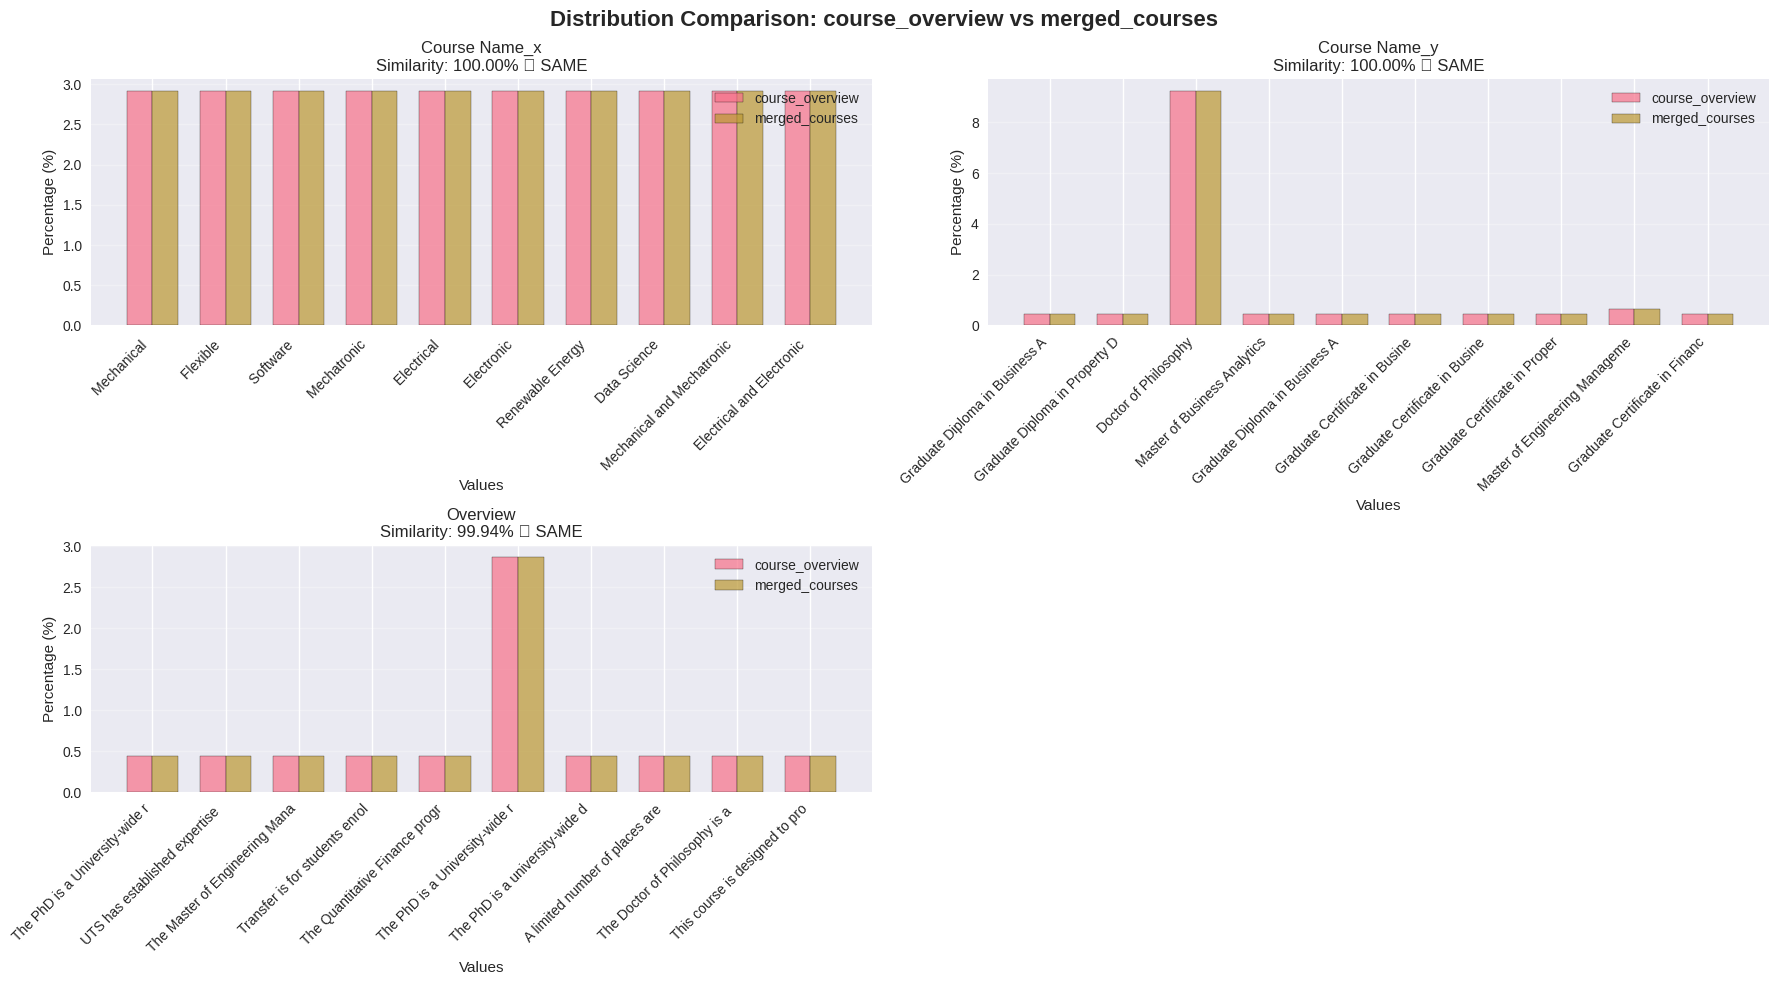


DISTRIBUTION COMPARISON SUMMARY
       Column Similarity (%) Status
Course Name_x         100.00 ✅ SAME
Course Name_y         100.00 ✅ SAME
     Overview          99.94 ✅ SAME

----------------------------------------------------------------------
OVERALL STATISTICS:
----------------------------------------------------------------------
Columns with identical distributions: 3/3
Columns with different distributions: 0/3
Average similarity: 99.98%

✅ All common columns have identical distributions!


In [29]:
print("DISTRIBUTION COMPARISON: course_overview vs merged_courses")
print("=" * 70)

# Check if variables are defined
try:
    if 'course_overview' not in globals() or course_overview is None:
        data_dir = Path("data/original_course_list_excel")
        course_overview = pd.read_csv(data_dir / "UTS_Course_Overview.csv")
except:
    pass

try:
    if 'merged_courses' not in globals() or merged_courses is None:
        data_dir = Path("data/original_course_list_excel")
        merged_courses = pd.read_csv(data_dir / "merged_Admission_Courses.csv")
except:
    pass

if course_overview is not None and merged_courses is not None:
    # Find common columns
    common_cols = set(course_overview.columns) & set(merged_courses.columns)
    
    print(f"\nCommon columns to compare: {len(common_cols)}")
    print(f"Columns: {sorted(common_cols)}")
    
    if len(common_cols) > 0:
        # Find merge key
        merge_key = None
        if 'Course Code' in common_cols:
            merge_key = 'Course Code'
        elif 'Course Name_y' in common_cols:
            merge_key = 'Course Name_y'
        elif 'Course Name_x' in common_cols:
            merge_key = 'Course Name_x'
        
        if merge_key:
            # Merge datasets
            merged_comparison = course_overview.merge(
                merged_courses,
                on=merge_key,
                how='inner',
                suffixes=('_overview', '_merged')
            )
            
            print(f"\nRows matched for comparison: {len(merged_comparison)}")
            
            # Function to compare distributions
            def compare_distributions(col_name, df_overview, df_merged, merged_df, merge_key):
                """Compare distributions of a column between two datasets"""
                col_overview = f"{col_name}_overview"
                col_merged = f"{col_name}_merged"
                
                if col_overview not in merged_df.columns or col_merged not in merged_df.columns:
                    return None
                
                # Get value counts for both
                overview_counts = merged_df[col_overview].value_counts().head(20)
                merged_counts = merged_df[col_merged].value_counts().head(20)
                
                # Check if distributions are the same
                # Compare normalized distributions (percentages)
                overview_pct = (merged_df[col_overview].value_counts(normalize=True) * 100).head(20)
                merged_pct = (merged_df[col_merged].value_counts(normalize=True) * 100).head(20)
                
                # Get all unique values
                all_values = set(overview_counts.index) | set(merged_counts.index)
                
                # Calculate similarity
                similarity_scores = []
                for val in all_values:
                    overview_val = overview_pct.get(val, 0)
                    merged_val = merged_pct.get(val, 0)
                    diff = abs(overview_val - merged_val)
                    similarity_scores.append(100 - diff)  # Higher is more similar
                
                avg_similarity = np.mean(similarity_scores) if similarity_scores else 0
                
                return {
                    'column': col_name,
                    'overview_counts': overview_counts,
                    'merged_counts': merged_counts,
                    'overview_pct': overview_pct,
                    'merged_pct': merged_pct,
                    'similarity': avg_similarity,
                    'is_same': avg_similarity > 99.9  # Consider same if >99.9% similar
                }
            
            # Compare each common column
            comparison_results = []
            
            for col in sorted(common_cols):
                if col == merge_key:
                    continue
                
                result = compare_distributions(col, course_overview, merged_courses, merged_comparison, merge_key)
                if result:
                    comparison_results.append(result)
            
            # Create comparison plots
            n_cols = len(comparison_results)
            if n_cols > 0:
                n_rows = (n_cols + 1) // 2
                
                fig, axes = plt.subplots(n_rows, 2, figsize=(18, 5 * n_rows))
                fig.suptitle('Distribution Comparison: course_overview vs merged_courses', 
                           fontsize=16, fontweight='bold')
                
                if n_cols == 1:
                    axes = [axes]
                else:
                    axes = axes.flatten()
                
                for idx, result in enumerate(comparison_results):
                    ax = axes[idx]
                    
                    # Get top values from both
                    top_values = list(set(list(result['overview_pct'].index[:10]) + 
                                         list(result['merged_pct'].index[:10])))[:10]
                    
                    if len(top_values) > 0:
                        overview_vals = [result['overview_pct'].get(v, 0) for v in top_values]
                        merged_vals = [result['merged_pct'].get(v, 0) for v in top_values]
                        
                        x = np.arange(len(top_values))
                        width = 0.35
                        
                        ax.bar(x - width/2, overview_vals, width, label='course_overview', 
                              alpha=0.7, edgecolor='black')
                        ax.bar(x + width/2, merged_vals, width, label='merged_courses', 
                              alpha=0.7, edgecolor='black')
                        
                        ax.set_xlabel('Values')
                        ax.set_ylabel('Percentage (%)')
                        ax.set_title(f"{result['column']}\nSimilarity: {result['similarity']:.2f}% "
                                   f"{'✅ SAME' if result['is_same'] else '⚠️ DIFFERENT'}")
                        ax.set_xticks(x)
                        ax.set_xticklabels([str(v)[:30] for v in top_values], rotation=45, ha='right')
                        ax.legend()
                        ax.grid(axis='y', alpha=0.3)
                    else:
                        ax.text(0.5, 0.5, "No data to compare", 
                               ha='center', va='center', transform=ax.transAxes)
                        ax.set_title(f"{result['column']} - No Data")
                
                # Hide extra subplots
                for idx in range(n_cols, len(axes)):
                    axes[idx].axis('off')
                
                plt.tight_layout()
                plt.show()
                
                # Summary table
                print("\n" + "=" * 70)
                print("DISTRIBUTION COMPARISON SUMMARY")
                print("=" * 70)
                
                summary_data = []
                for result in comparison_results:
                    summary_data.append({
                        'Column': result['column'],
                        'Similarity (%)': f"{result['similarity']:.2f}",
                        'Status': '✅ SAME' if result['is_same'] else '⚠️ DIFFERENT'
                    })
                
                summary_df = pd.DataFrame(summary_data)
                print(summary_df.to_string(index=False))
                
                # Overall statistics
                print("\n" + "-" * 70)
                print("OVERALL STATISTICS:")
                print("-" * 70)
                same_count = sum(1 for r in comparison_results if r['is_same'])
                different_count = len(comparison_results) - same_count
                avg_similarity = np.mean([r['similarity'] for r in comparison_results])
                
                print(f"Columns with identical distributions: {same_count}/{len(comparison_results)}")
                print(f"Columns with different distributions: {different_count}/{len(comparison_results)}")
                print(f"Average similarity: {avg_similarity:.2f}%")
                
                if same_count == len(comparison_results):
                    print("\n✅ All common columns have identical distributions!")
                elif different_count > 0:
                    print(f"\n⚠️  {different_count} column(s) have different distributions:")
                    for result in comparison_results:
                        if not result['is_same']:
                            print(f"  - {result['column']}: {result['similarity']:.2f}% similar")
            else:
                print("⚠️  No columns to compare")
        else:
            print("⚠️  Cannot find merge key for comparison")
    else:
        print("⚠️  No common columns found to compare")
else:
    print("❌ Cannot compare: One or both datasets not loaded")


## 8. Visualizations


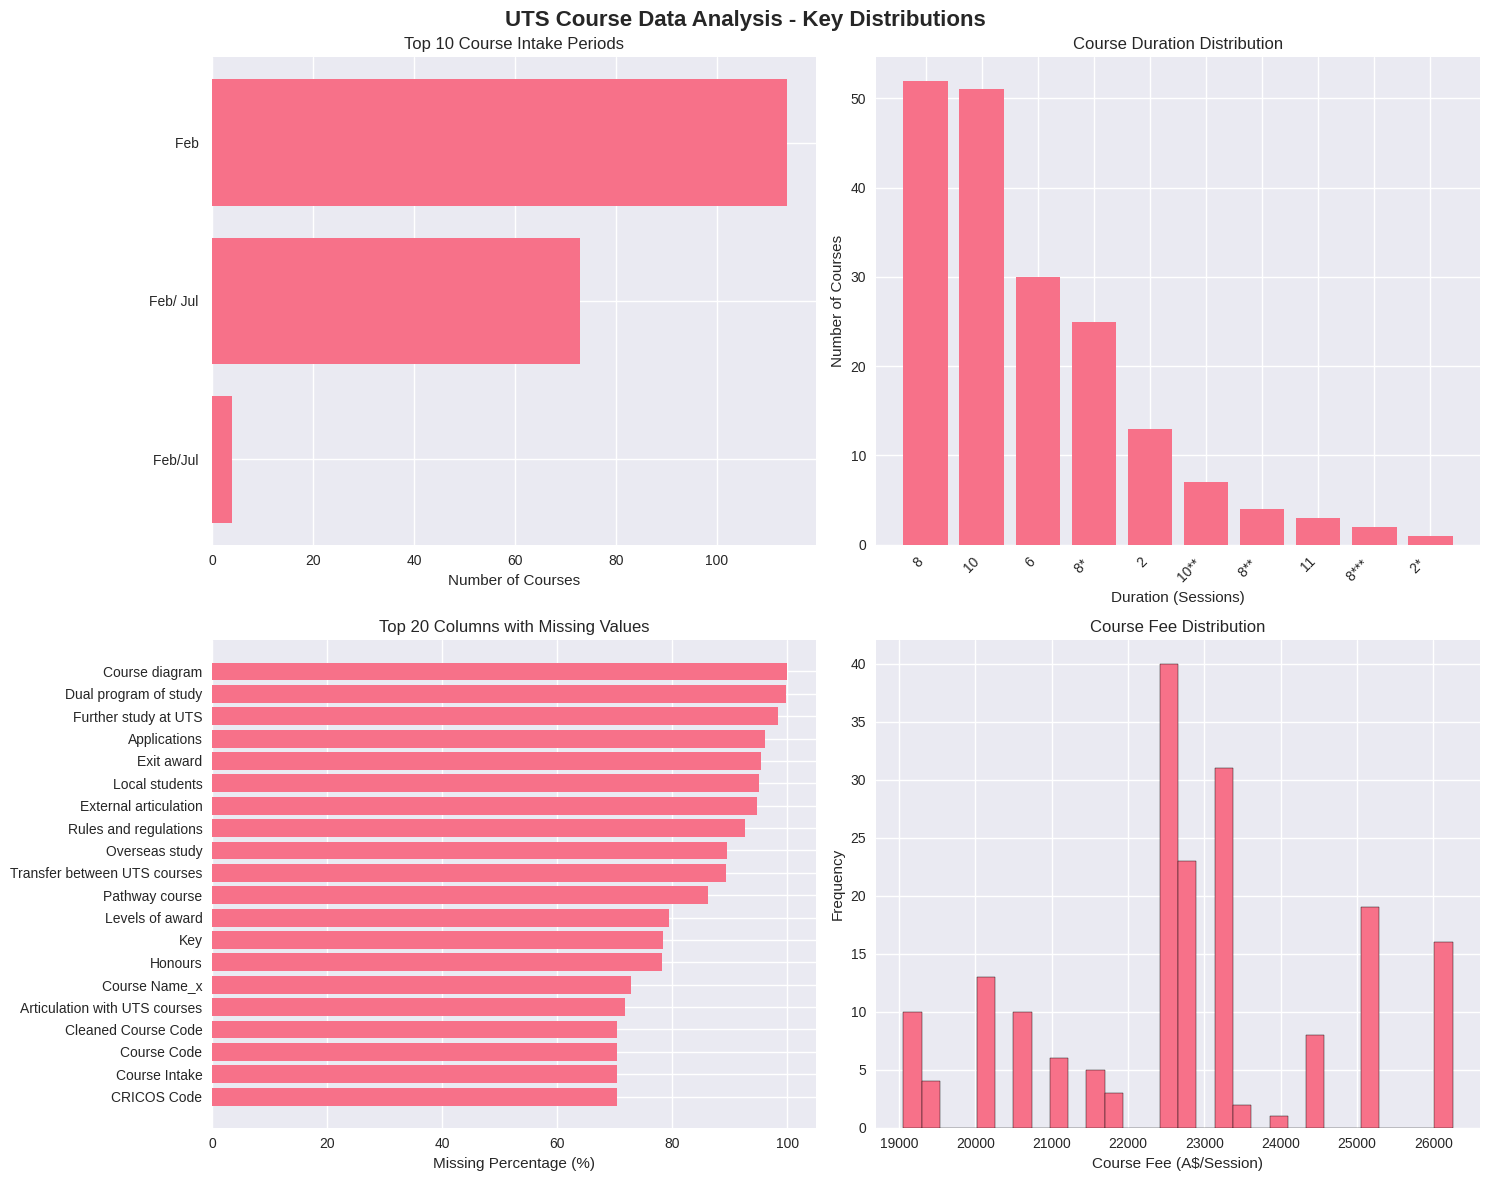

In [30]:
# Create visualizations
if merged_courses is not None:
    # Set up the plotting area
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('UTS Course Data Analysis - Key Distributions', fontsize=16, fontweight='bold')
    
    # 1. Course Intake Distribution
    if 'Course Intake' in merged_courses.columns:
        ax1 = axes[0, 0]
        intake_counts = merged_courses['Course Intake'].value_counts().head(10)
        ax1.barh(intake_counts.index, intake_counts.values)
        ax1.set_xlabel('Number of Courses')
        ax1.set_title('Top 10 Course Intake Periods')
        ax1.invert_yaxis()
    
    # 2. Course Duration Distribution
    if 'Course Duration (Session)' in merged_courses.columns:
        ax2 = axes[0, 1]
        duration_counts = merged_courses['Course Duration (Session)'].value_counts().head(10)
        ax2.bar(duration_counts.index.astype(str), duration_counts.values)
        ax2.set_xlabel('Duration (Sessions)')
        ax2.set_ylabel('Number of Courses')
        ax2.set_title('Course Duration Distribution')
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # 3. Missing Values Heatmap (top 20 columns with most missing values)
    if merged_courses.isnull().sum().sum() > 0:
        ax3 = axes[1, 0]
        missing_data = merged_courses.isnull().sum().sort_values(ascending=False).head(20)
        missing_pct = (missing_data / len(merged_courses)) * 100
        ax3.barh(range(len(missing_data)), missing_pct.values)
        ax3.set_yticks(range(len(missing_data)))
        ax3.set_yticklabels(missing_data.index)
        ax3.set_xlabel('Missing Percentage (%)')
        ax3.set_title('Top 20 Columns with Missing Values')
        ax3.invert_yaxis()
    
    # 4. Course Fee Distribution (if available)
    if 'Course Fee (A$/Session)' in merged_courses.columns:
        ax4 = axes[1, 1]
        fee_data = merged_courses['Course Fee (A$/Session)'].dropna()
        if len(fee_data) > 0:
            ax4.hist(fee_data, bins=30, edgecolor='black')
            ax4.set_xlabel('Course Fee (A$/Session)')
            ax4.set_ylabel('Frequency')
            ax4.set_title('Course Fee Distribution')
    
    plt.tight_layout()
    plt.show()
else:
    print("Cannot create visualizations: merged_Admission_Courses.csv not loaded")


## 9. Data Quality Checks


In [31]:
print("DATA QUALITY CHECKS")
print("=" * 70)

if merged_courses is not None:
    # Check for duplicates
    print("\n1. DUPLICATE RECORDS")
    print("-" * 70)
    duplicate_count = merged_courses.duplicated().sum()
    print(f"Total duplicate rows: {duplicate_count}")
    
    if 'Course Code' in merged_courses.columns:
        duplicate_codes = merged_courses.duplicated(subset=['Course Code']).sum()
        print(f"Duplicate Course Codes: {duplicate_codes}")
    
    # Check for inconsistent data
    print("\n2. DATA CONSISTENCY CHECKS")
    print("-" * 70)
    
    # Check if Course Code matches between columns
    if 'Course Code' in merged_courses.columns and 'Cleaned Course Code' in merged_courses.columns:
        code_mismatch = (merged_courses['Course Code'].fillna('') != merged_courses['Cleaned Course Code'].fillna('')).sum()
        print(f"Course Code vs Cleaned Course Code mismatches: {code_mismatch}")
    
    # Check for empty strings that should be NaN
    print("\n3. EMPTY STRING CHECKS")
    print("-" * 70)
    empty_strings = {}
    for col in merged_courses.select_dtypes(include=['object']).columns:
        empty_count = (merged_courses[col] == '').sum()
        if empty_count > 0:
            empty_strings[col] = empty_count
    
    if empty_strings:
        print("Columns with empty strings:")
        for col, count in sorted(empty_strings.items(), key=lambda x: x[1], reverse=True)[:10]:
            print(f"  {col}: {count} empty strings")
    else:
        print("No empty strings found")
    
    # Check data types consistency
    print("\n4. DATA TYPE CONSISTENCY")
    print("-" * 70)
    print("Columns that might need type conversion:")
    for col in merged_courses.columns:
        if merged_courses[col].dtype == 'object':
            # Try to detect if it should be numeric
            try:
                pd.to_numeric(merged_courses[col].dropna().head(100))
                print(f"  {col}: Might be numeric (currently object)")
            except:
                pass
    
    print("\n" + "=" * 70)
else:
    print("Cannot perform data quality checks: merged_Admission_Courses.csv not loaded")


DATA QUALITY CHECKS

1. DUPLICATE RECORDS
----------------------------------------------------------------------
Total duplicate rows: 21
Duplicate Course Codes: 510

2. DATA CONSISTENCY CHECKS
----------------------------------------------------------------------
Course Code vs Cleaned Course Code mismatches: 191

3. EMPTY STRING CHECKS
----------------------------------------------------------------------
No empty strings found

4. DATA TYPE CONSISTENCY
----------------------------------------------------------------------
Columns that might need type conversion:



## 10. Summary and Conclusions


In [32]:
print("ANALYSIS SUMMARY")
print("=" * 70)

summary = {
    "Dataset": [],
    "Rows": [],
    "Columns": [],
    "Status": []
}

if course_list is not None:
    summary["Dataset"].append("UTS_Course_list")
    summary["Rows"].append(len(course_list))
    summary["Columns"].append(len(course_list.columns))
    summary["Status"].append("✅ Loaded")

if course_overview is not None:
    summary["Dataset"].append("UTS_Course_Overview")
    summary["Rows"].append(len(course_overview))
    summary["Columns"].append(len(course_overview.columns))
    summary["Status"].append("✅ Loaded")

if merged_courses is not None:
    summary["Dataset"].append("merged_Admission_Courses")
    summary["Rows"].append(len(merged_courses))
    summary["Columns"].append(len(merged_courses.columns))
    summary["Status"].append("✅ Loaded")

summary_df = pd.DataFrame(summary)
print("\nDataset Summary:")
print(summary_df.to_string(index=False))

print("\n" + "=" * 70)
print("KEY FINDINGS:")
print("=" * 70)

if merged_courses is not None:
    print(f"\n1. merged_Admission_Courses.csv contains {len(merged_courses)} records")
    print(f"2. Total columns: {len(merged_courses.columns)}")
    print(f"3. Missing values: {merged_courses.isnull().sum().sum()} total missing values")
    
    if 'Course Code' in merged_courses.columns:
        print(f"4. Unique course codes: {merged_courses['Course Code'].nunique()}")
    
    if 'Course Name_y' in merged_courses.columns:
        print(f"5. Unique course names: {merged_courses['Course Name_y'].nunique()}")

print("\n" + "=" * 70)
print("RECOMMENDATIONS:")
print("=" * 70)
print("1. Review missing values and decide on imputation strategy")
print("2. Verify data completeness by comparing with source files")
print("3. Consider data type conversions for better performance")
print("4. Remove or handle duplicate records if found")
print("5. Standardize categorical values (e.g., Course Intake formats)")
print("\n" + "=" * 70)


ANALYSIS SUMMARY

Dataset Summary:
                 Dataset  Rows  Columns   Status
         UTS_Course_list   644        1 ✅ Loaded
     UTS_Course_Overview   644        4 ✅ Loaded
merged_Admission_Courses   644       58 ✅ Loaded

KEY FINDINGS:

1. merged_Admission_Courses.csv contains 644 records
2. Total columns: 58
3. Missing values: 20223 total missing values
4. Unique course codes: 133
5. Unique course names: 528

RECOMMENDATIONS:
1. Review missing values and decide on imputation strategy
2. Verify data completeness by comparing with source files
3. Consider data type conversions for better performance
4. Remove or handle duplicate records if found
5. Standardize categorical values (e.g., Course Intake formats)

